In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

#### Import our dataset named df

In [8]:
df = pd.read_csv("/Users/haowu/Desktop/Boston_University_Graduate_Study/github/MET-CS/CS 767/Data/Assignment_2.csv")
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value_in_M,Wage_in_K,Jersey_Number,Height_in_Inches,Weight_in_lbs,Reactions,Balance,Strength
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,565,10,67,159,95,95,59
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77.0,405,7,74,183,96,70,79
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,290,10,69,150,94,84,49
3,193080,De Gea,27,Spain,91,93,Manchester United,72.0,260,1,76,168,90,43,64
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,355,7,71,154,91,77,75


#### Check if there any null value will effect our perdict

In [9]:
df.isnull().sum()  

ID                  0
Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club                1
Value_in_M          0
Wage_in_K           0
Jersey_Number       0
Height_in_Inches    0
Weight_in_lbs       0
Reactions           0
Balance             0
Strength            0
dtype: int64

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Set x as independent variable, y as dependent variable

In [11]:
x = df[['Reactions','Balance','Strength']]
y = df['Value_in_M']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [13]:
lr = LinearRegression()
model = lr.fit(x_train,y_train)

In [14]:
print(model.intercept_,model.coef_)

-176.6834737565495 [2.3974095  0.11688426 0.03696524]


#### Value_in_M = -176.684 + 2.397xReactions + 0.117xBalance + 0.037xStrength

#### Get our R_square and MSE evaluate our model

In [15]:
y_pred = model.predict(x_test)
print("MSE:",mean_squared_error(y_test, y_pred))
print("R2:",r2_score(y_test, y_pred))

MSE: 134.17165302152824
R2: 0.4644363812744301


#### We know that our model is not very ideal by R2, but the MSE is very low, which means that our model may be overfitting.

#### Since we did not observe the relationship between the independent variable and the dependent variable by drawing a graph in advance, it is not easy for us to draw conclusions.

#### BGD

In [16]:
import matplotlib.pyplot as plt

In [69]:
def hypothesis(X, theta):
    return np.dot(X, theta)

In [68]:
def gradient(X, y, theta):
    h = hypothesis(X, theta)
    grad = np.dot(X.transpose(), (h - y))
    return grad

In [67]:
def cost(X, y, theta):
    h = hypothesis(X, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J[0]

In [76]:
def gradientDescent(X, y, theta,lr, iters):
    error_list = []
    for i in range(iters):
        theta = theta - lr * gradient(X, y, theta)
        error_list.append(cost(X, y, theta))
    return theta, error_list

In [150]:
theta = np.ones((x_train.shape[1]))
cost_history = [0]*1000

In [137]:
theta

array([1., 1., 1.])

#### We first define the value we need to use from start to finish -----MSE (can also be a loss function)

In [132]:
def cost_function(x, y, theta):
    y_pred = np.dot(x,theta.T)
    cost =  np.sum((y_pred - y) ** 2)/(2*len(y))
    return cost

In [152]:
def batch_gradient_descent(x,y,theta,lr,iters):
    x_norm = (x - x.min()) / (x.max() - x.min()) ## normalization our data
    x = x_norm
    for i in range(0,iters):         
        y_pred = np.dot(x,theta.T)
        cost =  np.sum((y_pred - y) ** 2)/(2*len(y))
        theta = theta - (lr/len(y)) * np.dot(y_pred - y,x)
        cost_history[i] = cost

Text(0.5, 1.0, 'BDG Train')

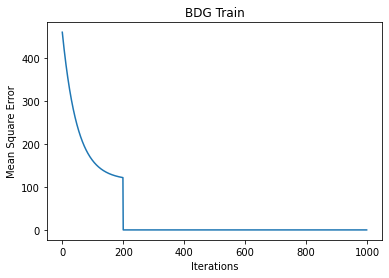

In [153]:
batch_gradient_descent(x_train,y_train,theta,0.01,200)
plt.plot(cost_history)
plt.ylabel('Mean Square Error')
plt.xlabel('Iterations')
plt.title('BDG Train')

/var/folders/h3/jzsxdpmd7gdfh6kxryfd8f240000gn/T/ipykernel_70375/3851091141.py:4: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (lr/len(y)) * np.dot(y_pred - y,x)


Text(0.5, 1.0, 'BDG Test')

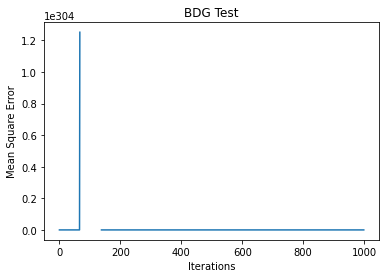

In [56]:
batch_gradient_descent(x_test,y_test,theta,0.01,1000)
plt.plot(cost_history)
plt.ylabel('Mean Square Error')
plt.xlabel('Iterations')
plt.title('BDG Test')

#### By constantly iterating over the overall dataset, we can find that at 200 iterations, we basically reach the minimum.

## Stochastic gradient descent

In [16]:
import random

#### The key to SGD is to randomly select a set of data sets and then perform update iterations.

In [17]:
theta = np.zeros(x_train.shape[1])
cost_history = [0] * 1000
def stochastic_gradient_descent(x,y,theta,lr,iters):
    x_norm = (x - x.min()) / (x.max() - x.min()) ## normalization our data
    x = x_norm
    data = []
    for j in range(len(x)):
        data.append(j)
    for i in range(iters):
        index = random.sample(data,1)
        index = index[0]
        y_pred = np.dot(x[index:index+1],theta.T)
        theta = theta - (lr/len(y)) * np.dot(y_pred - y[index:index+1],x[index:index+1])
        cost_history[i] = cost_function(x,y,theta)
            

Text(0.5, 1.0, 'SDG Train')

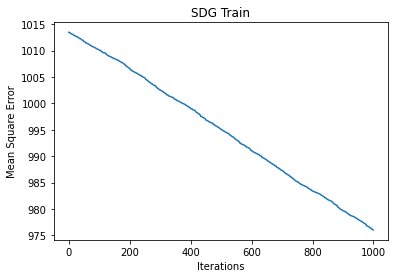

In [18]:
stochastic_gradient_descent(x_train,y_train,theta,0.01,1000)
plt.plot(cost_history)
plt.ylabel('Mean Square Error')
plt.xlabel('Iterations')
plt.title('SDG Train')

Text(0.5, 1.0, 'SDG Test')

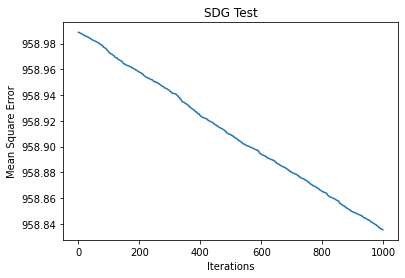

In [19]:
stochastic_gradient_descent(x_test,y_test,theta,0.00001,1000)
plt.plot(cost_history)
plt.ylabel('Mean Square Error')
plt.xlabel('Iterations')
plt.title('SDG Test')

#### We can find that as we increase the number of iterations, we get closer and closer to the minimum, but this process is slow.

# Mini-Batch

In [30]:
import math
from random import shuffle

#### Setting up the minibatch equation allows us to shuffle and group the dataset.

In [32]:
def mini_batches_function(x,y,minibatch_size):
    m = x.shape[0]
    n_minibatches = m // minibatch_size
    mini_batches = []
    x,y = shuffle(x,y)
    for j in range (0,n_minibatches):
        x_batch = x[j*minibatch_size:(j+1)*minibatch_size]
        y_batch = y[j*minibatch_size:(j+1)*minibatch_size]
        mini_batch = (x_batch, y_batch)
        mini_batches.append(mini_batch)
    if m % minibatch_size != 0:
        x_batch = x[n_minibatches*12:]
        y_batch = y[n_minibatches*12:]
        mini_batch = (x_batch, y_batch)
        mini_batches.append(mini_batch)
    return mini_batches

In [33]:
theta = np.zeros(x_train.shape[1])
cost_history = [0] * 1000

In [34]:
def mini_batch_function(x,y,theta,mini_batch_size,ler,iters):
    x_norm = (x - x.min()) / (x.max() - x.min()) ## normalization our data
    x = x_norm
    for i in range(iters):
        minibatches = mini_batches_function(x, y, mini_batch_size)
        for minibatch in minibatches:
            (x_batch, y_batch) = minibatch
            y_pred = np.dot(x_batch,theta)
            theta = theta - (ler/len(y_batch)) * np.dot(y_pred - y_batch,x_batch)
    cost_history[i] = cost_function(x_train,y_train,theta)

In [ ]:
mini_batch_function(x_train,y_train,theta,12,0.01,1000)
plt.plot(cost_history)
plt.ylabel('Mean Square Error')
plt.xlabel('Iterations')
plt.title('MBGD_train')

Text(0.5, 1.0, 'MBGD_test')

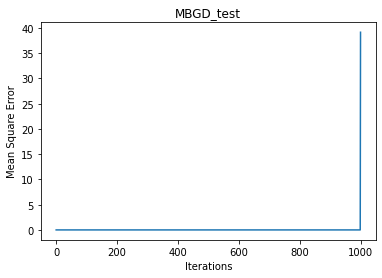

In [587]:
mini_batch_function(x_test,y_test,theta,12,0.01,1000)
plt.plot(cost_history)
plt.ylabel('Mean Square Error')
plt.xlabel('Iterations')
plt.title('MBGD_test')

# Problem 2 (10 points)
### What are the hyper parameters of ADAM Gradient descent and what are their impact on performance of the ADAM Gradient Descent?


## Answer：
### Taking the advantages of both momentum and RMSProp
### The hyper parameter is the decay rate of the sum of the first-order momentum, and the decay rate of the second-order moment gradient sum of squares.Adam's speed comes from the ability of momentum and RMSProp to adapt to gradients in different directions. The combination of the two makes it even stronger.

# Problem 3 (10 points)
### RMSProp is Prof Geoffrey Hinton’s favorite Gradient Descent approach. Why? Name two reasons.


## Answer:
### Rmsprop (Root Mean Square Propagation) fixes AdaGrad being very slow by adding a decay factor. The RMSProp algorithm does not directly accumulate squared gradients like the AdaGrad algorithm, but adds a decay coefficient to control how much historical information is obtained.
### In the direction where the parameter space is more gentle, more progress will be made (because of the smoothness, the squared sum of the historical gradients is smaller, and the corresponding learning decline is smaller), and the steep direction can be made gentle, thereby speeding up the training speed .